In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In this project, I am going to consider passenger data from the Titanic, which sunk on its maiden voyage. Of 2,224 passengers and crew, more than 1,500 died. I'm gonna check passengers' profile to figure out what attributes are correllated with survival rate in Titanic! 

In [5]:
df = pd.read_csv(r'C:\Users\vahid\OneDrive\Desktop\job\python\titanic.csv', header=0, sep=',')

In [6]:
# Now let's take a look at the data

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Some more information about the data:
- Pclass: passenger class. 
- SibSp: number of siblings+spouses aboard
- Parch: number of parents+children aboard
- Fare: cost of ticket
- Cabin: room ID, if passenger had a room
- Embarked: port of departure (C= Cherbourg; Q= Queenstown; S=Southampton)


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


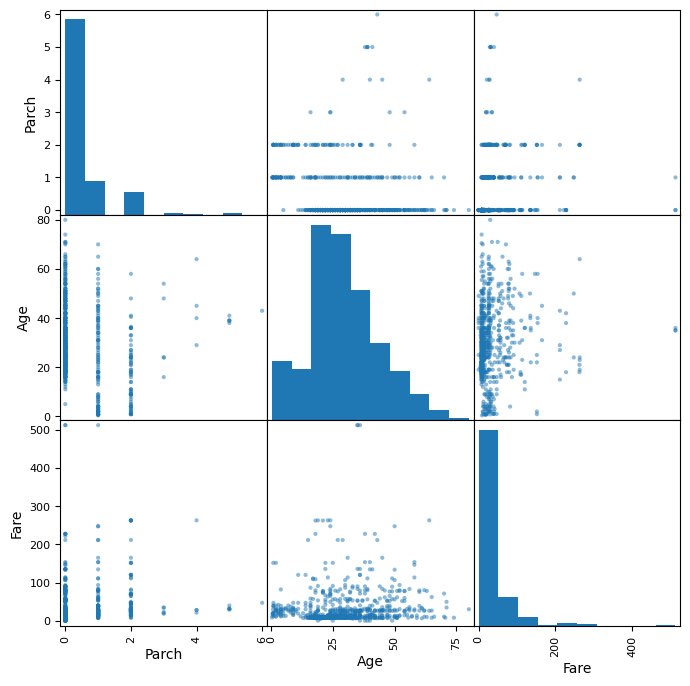

In [9]:
pd.plotting.scatter_matrix(df[['Parch','Age','Fare']],figsize=(8,8));

Now, we can ask the question does the average survival rate depend on the passengers ticket class? 
To check our hypothesis, we group passengers based on the colunm `Pclass`, this creates three groups. Then we calculate the average survival rate for each group separetly by calculating the mean of the `Survived` column. (Remeber this column is 1 if the passenger survived, 0 if they died; therefore the mean is the survival rate!)


In [10]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

What about "women and children first"? Does sex correlates with survival rate? 

In [11]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Woooooooow!!!!
Let's combine the two: groupby both class and sex, and calculate the survival rates.

In [12]:
survived_by_class_and_sex = df.groupby(['Pclass','Sex'])['Survived'].mean()
survived_by_class_and_sex

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

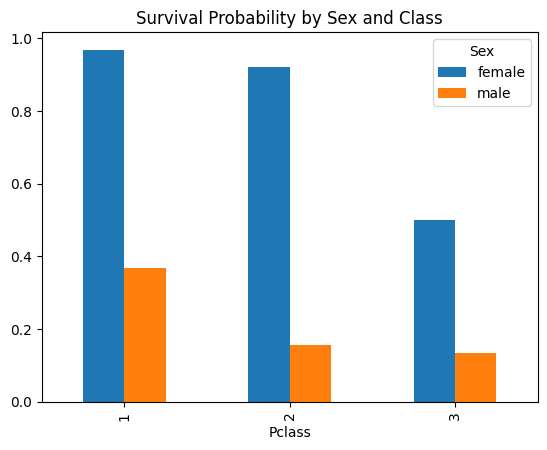

In [13]:
survived_by_class_and_sex.unstack(1).plot(kind='bar', title='Survival Probability by Sex and Class');

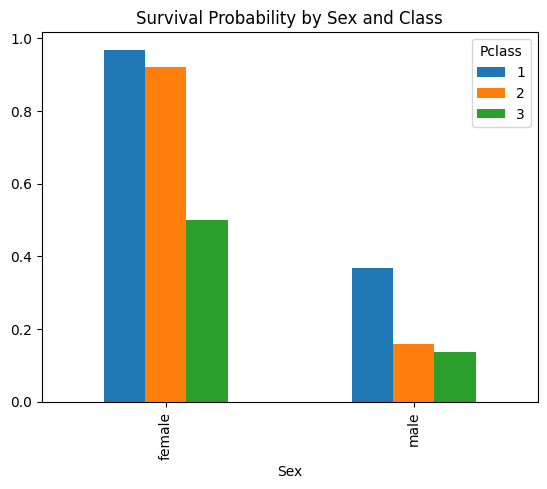

In [14]:
survived_by_class_and_sex.unstack(0).plot(kind='bar', title='Survival Probability by Sex and Class');